In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cvxpy as cp

In [2]:
# For data preprocess import
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

In [3]:
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
from string import punctuation
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions

In [5]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

%matplotlib inline

# DATA IMPORT

In [7]:
import pandas as pd

tweets = pd.read_csv(r'F:\Uni Stuff\BUSINESS CASE_GROUP PROJECT\Dataset _tiktokshop.csv' )
print(tweets)

      conversation_id_str                      created_at  favorite_count  \
0            1.620108e+18  Mon Jan 30 17:15:00 +0000 2023               0   
1            1.620054e+18  Mon Jan 30 13:39:03 +0000 2023               0   
2            1.620145e+18  Mon Jan 30 19:41:18 +0000 2023               0   
3            1.620023e+18  Mon Jan 30 11:37:49 +0000 2023               1   
4            1.619775e+18  Sun Jan 29 19:10:02 +0000 2023               0   
...                   ...                             ...             ...   
998          1.740786e+18  Fri Dec 29 17:24:33 +0000 2023              15   
999          1.740786e+18  Fri Dec 29 17:24:19 +0000 2023               7   
1000         1.740786e+18  Fri Dec 29 17:23:36 +0000 2023             114   
1001         1.740784e+18  Fri Dec 29 17:17:44 +0000 2023              32   
1002         1.740776e+18  Fri Dec 29 17:13:18 +0000 2023               0   

                                              full_text        id_str  \
0 

In [8]:
tweets  

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.620108e+18,Mon Jan 30 17:15:00 +0000 2023,0,lmaoooo don't buy perfumes off tiktok shop the...,1.620108e+18,NaN,NaN,en,NaN,0,1,0,https://x.com/p1scesprincess/status/1620108330...,1.476020e+18,p1scesprincess
1,1.620054e+18,Mon Jan 30 13:39:03 +0000 2023,0,My SHOP pay app full of orders I be ordering a...,1.620054e+18,NaN,NaN,en,"Tampa, FL",0,0,0,https://x.com/TheGeWayy/status/162005398468494...,2.684152e+08,TheGeWayy
2,1.620145e+18,Mon Jan 30 19:41:18 +0000 2023,0,Someone take tiktok shop away from me please,1.620145e+18,NaN,NaN,en,"Swansea, Wales",0,0,0,https://x.com/chelsey_thomas/status/1620145146...,2.458891e+07,chelsey_thomas
3,1.620023e+18,Mon Jan 30 11:37:49 +0000 2023,1,Why do TikTok Shop succeed but Instagram Shop ...,1.620023e+18,NaN,NaN,en,Kabupaten,0,2,0,https://x.com/wooper_dome/status/1620023472847...,1.771727e+08,wooper_dome
4,1.619775e+18,Sun Jan 29 19:10:02 +0000 2023,0,TikTok has changed the way products are market...,1.619775e+18,NaN,NaN,en,Ready to learn more? ðŸ‘‰,0,0,0,https://x.com/jackie_startok/status/1619774888...,1.430244e+18,jackie_startok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,1.740786e+18,Fri Dec 29 17:24:33 +0000 2023,15,Should I come out with a guide to help the com...,1.740786e+18,NaN,contentbyjaida,en,"Virginia Beach, VA",0,4,0,https://x.com/contentbyjaida/status/1740785890...,1.373135e+18,contentbyjaida
999,1.740786e+18,Fri Dec 29 17:24:19 +0000 2023,7,tf tiktok shop recommending me dawg https://t....,1.740786e+18,https://pbs.twimg.com/media/GCiDfGiXIAAMpWk.jpg,NaN,en,NaN,0,1,0,https://x.com/MosudaMania/status/1740785832334...,1.044586e+18,MosudaMania
1000,1.740786e+18,Fri Dec 29 17:23:36 +0000 2023,114,I made a brand $89k the month of December. I v...,1.740786e+18,https://pbs.twimg.com/media/GCiDUr9XwAAiccJ.jpg,NaN,en,"Virginia Beach, VA",1,33,4,https://x.com/contentbyjaida/status/1740785652...,1.373135e+18,contentbyjaida
1001,1.740784e+18,Fri Dec 29 17:17:44 +0000 2023,32,The best part about TikTok Shop is the chicken...,1.740784e+18,NaN,NaN,en,NaN,0,1,2,https://x.com/BowTiedOpossum/status/1740784176...,1.393004e+18,BowTiedOpossum


In [9]:
tweets.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.620108e+18,Mon Jan 30 17:15:00 +0000 2023,0,lmaoooo don't buy perfumes off tiktok shop the...,1.620108e+18,NaN,NaN,en,NaN,0,1,0,https://x.com/p1scesprincess/status/1620108330...,1.476020e+18,p1scesprincess
1,1.620054e+18,Mon Jan 30 13:39:03 +0000 2023,0,My SHOP pay app full of orders I be ordering a...,1.620054e+18,NaN,NaN,en,"Tampa, FL",0,0,0,https://x.com/TheGeWayy/status/162005398468494...,2.684152e+08,TheGeWayy
2,1.620145e+18,Mon Jan 30 19:41:18 +0000 2023,0,Someone take tiktok shop away from me please,1.620145e+18,NaN,NaN,en,"Swansea, Wales",0,0,0,https://x.com/chelsey_thomas/status/1620145146...,2.458891e+07,chelsey_thomas
3,1.620023e+18,Mon Jan 30 11:37:49 +0000 2023,1,Why do TikTok Shop succeed but Instagram Shop ...,1.620023e+18,NaN,NaN,en,Kabupaten,0,2,0,https://x.com/wooper_dome/status/1620023472847...,1.771727e+08,wooper_dome
4,1.619775e+18,Sun Jan 29 19:10:02 +0000 2023,0,TikTok has changed the way products are market...,1.619775e+18,NaN,NaN,en,Ready to learn more? ðŸ‘‰,0,0,0,https://x.com/jackie_startok/status/1619774888...,1.430244e+18,jackie_startok


In [10]:
tweets_df = tweets[['full_text']]
tweets_df.head()

,full_text
0,lmaoooo don't buy perfumes off tiktok shop the...
1,My SHOP pay app full of orders I be ordering a...
2,Someone take tiktok shop away from me please
3,Why do TikTok Shop succeed but Instagram Shop ...
4,TikTok has changed the way products are market...


In [11]:
tweets_df.shape

(1003, 1)

# DATA PREPROCESSING

In [12]:
tweets.drop_duplicates(inplace = True, subset="full_text")
tweets.duplicated()



0       False
1       False
2       False
3       False
4       False
        ...  
998     False
999     False
1000    False
1001    False
1002    False
Length: 997, dtype: bool

In [13]:
tweets_df

,full_text
0,lmaoooo don't buy perfumes off tiktok shop the...
1,My SHOP pay app full of orders I be ordering a...
2,Someone take tiktok shop away from me please
3,Why do TikTok Shop succeed but Instagram Shop ...
4,TikTok has changed the way products are market...
...,...
998,Should I come out with a guide to help the com...
999,tf tiktok shop recommending me dawg https://t....
1000,I made a brand $89k the month of December. I v...
1001,The best part about TikTok Shop is the chicken...


In [14]:
#To view the information of data
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  1003 non-null   object
dtypes: object(1)
memory usage: 8.0+ KB


In [15]:
#To create dataframe
cleaned = tweets_df[["full_text"]]

#Rearrange the index
cleaned_df = cleaned.reset_index(drop = True)
cleaned_df

,full_text
0,lmaoooo don't buy perfumes off tiktok shop the...
1,My SHOP pay app full of orders I be ordering a...
2,Someone take tiktok shop away from me please
3,Why do TikTok Shop succeed but Instagram Shop ...
4,TikTok has changed the way products are market...
...,...
998,Should I come out with a guide to help the com...
999,tf tiktok shop recommending me dawg https://t....
1000,I made a brand $89k the month of December. I v...
1001,The best part about TikTok Shop is the chicken...


In [16]:
#To remove NaN
cleaned_df = cleaned_df.dropna()

#To view the data after removing NaN
cleaned_df

,full_text
0,lmaoooo don't buy perfumes off tiktok shop the...
1,My SHOP pay app full of orders I be ordering a...
2,Someone take tiktok shop away from me please
3,Why do TikTok Shop succeed but Instagram Shop ...
4,TikTok has changed the way products are market...
...,...
998,Should I come out with a guide to help the com...
999,tf tiktok shop recommending me dawg https://t....
1000,I made a brand $89k the month of December. I v...
1001,The best part about TikTok Shop is the chicken...


In [17]:
#Lowercase coversion
cleaned_df['lowercase'] = cleaned_df.full_text.str.lower()
cleaned_df.head()

,full_text,lowercase
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...


In [18]:
#to convert the datatype to string
cleaned_df.full_text = cleaned_df.full_text.astype(str)

In [19]:
#Remove URL link
import re
cleaned_df['remove_link'] = cleaned_df.lowercase.apply(lambda x: re.sub(r'https?:\/\/\S+', '',x))
cleaned_df.lowercase.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
                                                                                                                                              
cleaned_df.head()

,full_text,lowercase,remove_link
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...


In [20]:
#remove twitter handles (mention)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
        return input_txt

In [21]:
#remove twitter handles (user)
cleaned_df['mention'] = np.vectorize(remove_pattern)(cleaned_df['remove_link'], "@[\w]*")

cleaned_df.head()

,full_text,lowercase,remove_link,mention
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None


In [22]:
import string
dir(string)

['Formatter',
 'Template',
 '_ChainMap',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_re',
 '_sentinel_dict',
 '_string',
 'ascii_letters',
 'ascii_lowercase',
 'ascii_uppercase',
 'capwords',
 'digits',
 'hexdigits',
 'octdigits',
 'printable',
 'punctuation',
 'whitespace']

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
cleaned_df['punctuation'] = cleaned_df['remove_link'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

print(cleaned_df)

                                              full_text  \
0     lmaoooo don't buy perfumes off tiktok shop the...   
1     My SHOP pay app full of orders I be ordering a...   
2         Someone take tiktok shop away from me please    
3     Why do TikTok Shop succeed but Instagram Shop ...   
4     TikTok has changed the way products are market...   
...                                                 ...   
998   Should I come out with a guide to help the com...   
999   tf tiktok shop recommending me dawg https://t....   
1000  I made a brand $89k the month of December. I v...   
1001  The best part about TikTok Shop is the chicken...   
1002  @slowyourprose Yo wtf I need to shop through T...   

                                              lowercase  \
0     lmaoooo don't buy perfumes off tiktok shop the...   
1     my shop pay app full of orders i be ordering a...   
2         someone take tiktok shop away from me please    
3     why do tiktok shop succeed but instagram shop ...

In [25]:
def clean_text(full_text):
    return re.sub(r'[^\w\s]', '', full_text)

In [26]:
cleaned_df.head()

,full_text,lowercase,remove_link,mention,punctuation
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo dont buy perfumes off tiktok shop thes...
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...


In [27]:
cleaned_df['remove_link'].apply(lambda x: clean_text(x))

0       lmaoooo dont buy perfumes off tiktok shop thes...
1       my shop pay app full of orders i be ordering a...
2           someone take tiktok shop away from me please 
3       why do tiktok shop succeed but instagram shop ...
4       tiktok has changed the way products are market...
                              ...                        
998     should i come out with a guide to help the com...
999                  tf tiktok shop recommending me dawg 
1000    i made a brand 89k the month of december i ve ...
1001    the best part about tiktok shop is the chicken...
1002    slowyourprose yo wtf i need to shop through ti...
Name: remove_link, Length: 1003, dtype: object

In [28]:
#Remove punctuation
cleaned_df['punctuation'] = cleaned_df.remove_link.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))

cleaned_df.head()

,full_text,lowercase,remove_link,mention,punctuation
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...


In [29]:
cleaned_df['expand_word'] = cleaned_df['punctuation'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [30]:
cleaned_df['expand_word'] = [' '.join(map(str, l)) for l in cleaned_df['expand_word']]

cleaned_df.head()

,full_text,lowercase,remove_link,mention,punctuation,expand_word
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo do not buy perfumes off tiktok shop th...
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please,someone take tiktok shop away from me please
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...


In [31]:
#Remove #
cleaned_df['hashtag']= cleaned_df.expand_word.apply(lambda x: re.sub("#[A-Za-z0-9_]+","", x))

cleaned_df.head(3)

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo do not buy perfumes off tiktok shop th...
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please


In [32]:
#remove short word that has length word 2 or less
cleaned_df['remove_short'] = cleaned_df['hashtag'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

cleaned_df.head()

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo not buy perfumes off tiktok shop these...
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from please
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...


In [33]:
#tokenization
import nltk
nltk.download('punkt_tab')

cleaned_df['tokenized'] = cleaned_df['remove_short'].apply(word_tokenize)
cleaned_df.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo not buy perfumes off tiktok shop these...,"[lmaoooo, not, buy, perfumes, off, tiktok, sho..."
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth..."
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from please,"[someone, take, tiktok, shop, away, from, please]"
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s..."
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are..."


In [34]:
#Stop word library
nltk.download("stopwords")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
#Stopword removal

import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

#set of stop words
stop_words = set(stopwords.words('english'))

cleaned_df['stopwords_removed'] = cleaned_df.tokenized.apply(lambda x: [word for word in x if word not in stop_words])

In [36]:
cleaned_df.head()

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized,stopwords_removed
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo not buy perfumes off tiktok shop these...,"[lmaoooo, not, buy, perfumes, off, tiktok, sho...","[lmaoooo, buy, perfumes, tiktok, shop, people,..."
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth...","[shop, pay, app, full, orders, ordering, anyth..."
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from please,"[someone, take, tiktok, shop, away, from, please]","[someone, take, tiktok, shop, away, please]"
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s...","[tiktok, shop, succeed, instagram, shop, faile..."
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are...","[tiktok, changed, way, products, marketed, for..."


In [37]:
#pos tag to label the type of word
import nltk
nltk.download('averaged_perceptron_tagger_eng')

cleaned_df['pos_tags'] = cleaned_df['stopwords_removed'].apply(nltk.tag.pos_tag)
cleaned_df.head()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized,stopwords_removed,pos_tags
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo not buy perfumes off tiktok shop these...,"[lmaoooo, not, buy, perfumes, off, tiktok, sho...","[lmaoooo, buy, perfumes, tiktok, shop, people,...","[(lmaoooo, JJ), (buy, NN), (perfumes, NNS), (t..."
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth...","[shop, pay, app, full, orders, ordering, anyth...","[(shop, NN), (pay, NN), (app, VBP), (full, JJ)..."
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from please,"[someone, take, tiktok, shop, away, from, please]","[someone, take, tiktok, shop, away, please]","[(someone, NN), (take, VB), (tiktok, NN), (sho..."
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s...","[tiktok, shop, succeed, instagram, shop, faile...","[(tiktok, NN), (shop, NN), (succeed, VB), (ins..."
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are...","[tiktok, changed, way, products, marketed, for...","[(tiktok, NNS), (changed, VBD), (way, NN), (pr..."


In [38]:
#To convert pos tag to word net to use lemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
cleaned_df['wordnet_pos'] = cleaned_df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x]) 

In [40]:
cleaned_df.head()

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized,stopwords_removed,pos_tags,wordnet_pos
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo not buy perfumes off tiktok shop these...,"[lmaoooo, not, buy, perfumes, off, tiktok, sho...","[lmaoooo, buy, perfumes, tiktok, shop, people,...","[(lmaoooo, JJ), (buy, NN), (perfumes, NNS), (t...","[(lmaoooo, a), (buy, n), (perfumes, n), (tikto..."
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth...","[shop, pay, app, full, orders, ordering, anyth...","[(shop, NN), (pay, NN), (app, VBP), (full, JJ)...","[(shop, n), (pay, n), (app, v), (full, a), (or..."
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from please,"[someone, take, tiktok, shop, away, from, please]","[someone, take, tiktok, shop, away, please]","[(someone, NN), (take, VB), (tiktok, NN), (sho...","[(someone, n), (take, v), (tiktok, n), (shop, ..."
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s...","[tiktok, shop, succeed, instagram, shop, faile...","[(tiktok, NN), (shop, NN), (succeed, VB), (ins...","[(tiktok, n), (shop, n), (succeed, v), (instag..."
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are...","[tiktok, changed, way, products, marketed, for...","[(tiktok, NNS), (changed, VBD), (way, NN), (pr...","[(tiktok, n), (changed, v), (way, n), (product..."


In [41]:
#Lemmatizer
wnl = WordNetLemmatizer()
cleaned_df['lemmatized'] = cleaned_df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
cleaned_df.head()

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo not buy perfumes off tiktok shop these...,"[lmaoooo, not, buy, perfumes, off, tiktok, sho...","[lmaoooo, buy, perfumes, tiktok, shop, people,...","[(lmaoooo, JJ), (buy, NN), (perfumes, NNS), (t...","[(lmaoooo, a), (buy, n), (perfumes, n), (tikto...","[lmaoooo, buy, perfume, tiktok, shop, people, ..."
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth...","[shop, pay, app, full, orders, ordering, anyth...","[(shop, NN), (pay, NN), (app, VBP), (full, JJ)...","[(shop, n), (pay, n), (app, v), (full, a), (or...","[shop, pay, app, full, order, order, anything,..."
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from please,"[someone, take, tiktok, shop, away, from, please]","[someone, take, tiktok, shop, away, please]","[(someone, NN), (take, VB), (tiktok, NN), (sho...","[(someone, n), (take, v), (tiktok, n), (shop, ...","[someone, take, tiktok, shop, away, please]"
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s...","[tiktok, shop, succeed, instagram, shop, faile...","[(tiktok, NN), (shop, NN), (succeed, VB), (ins...","[(tiktok, n), (shop, n), (succeed, v), (instag...","[tiktok, shop, succeed, instagram, shop, fail,..."
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are...","[tiktok, changed, way, products, marketed, for...","[(tiktok, NNS), (changed, VBD), (way, NN), (pr...","[(tiktok, n), (changed, v), (way, n), (product...","[tiktok, change, way, product, market, forever..."


In [42]:
#Saving dataframe in csv
cleaned_df.to_csv('Preprocessed_Data')
# tweets_df.to_excel("preprocessed_data.xlsx", index=False)

# Label Using Text Blob

In [43]:
#labelling library

import string
import nltk
import plotly.express as px
from nltk.sentiment.util import *

In [44]:
from wordcloud import WordCloud
import os
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
from nltk import tokenize

In [45]:
cleaned_df.head()

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo not buy perfumes off tiktok shop these...,"[lmaoooo, not, buy, perfumes, off, tiktok, sho...","[lmaoooo, buy, perfumes, tiktok, shop, people,...","[(lmaoooo, JJ), (buy, NN), (perfumes, NNS), (t...","[(lmaoooo, a), (buy, n), (perfumes, n), (tikto...","[lmaoooo, buy, perfume, tiktok, shop, people, ..."
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth...","[shop, pay, app, full, orders, ordering, anyth...","[(shop, NN), (pay, NN), (app, VBP), (full, JJ)...","[(shop, n), (pay, n), (app, v), (full, a), (or...","[shop, pay, app, full, order, order, anything,..."
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from please,"[someone, take, tiktok, shop, away, from, please]","[someone, take, tiktok, shop, away, please]","[(someone, NN), (take, VB), (tiktok, NN), (sho...","[(someone, n), (take, v), (tiktok, n), (shop, ...","[someone, take, tiktok, shop, away, please]"
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s...","[tiktok, shop, succeed, instagram, shop, faile...","[(tiktok, NN), (shop, NN), (succeed, VB), (ins...","[(tiktok, n), (shop, n), (succeed, v), (instag...","[tiktok, shop, succeed, instagram, shop, fail,..."
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are...","[tiktok, changed, way, products, marketed, for...","[(tiktok, NNS), (changed, VBD), (way, NN), (pr...","[(tiktok, n), (changed, v), (way, n), (product...","[tiktok, change, way, product, market, forever..."


In [46]:
#using polarity
from textblob import TextBlob

# Ensure the 'lemmatized' column is of type string
cleaned_df["lemmatized"] = cleaned_df["lemmatized"].astype("str")
cleaned_df['label'] = ''  # Initialize the 'label' column

# Iterate over the rows of the 'lemmatized' column using items()
for i, x in cleaned_df['lemmatized'].items():
    label = TextBlob(x)
    cleaned_df.at[i, 'label'] = label.sentiment.polarity  # Use .at to set the value
    print("Index: ", i, "label", label.sentiment.polarity)

Index:  0 label 0.0
Index:  1 label 0.07499999999999998
Index:  2 label 0.0
Index:  3 label -0.75
Index:  4 label 0.4166666666666667
Index:  5 label 0.13636363636363635
Index:  6 label 0.0
Index:  7 label 0.0
Index:  8 label 0.24444444444444446
Index:  9 label 0.8
Index:  10 label 0.0
Index:  11 label 0.0
Index:  12 label 0.0
Index:  13 label 0.1340909090909091
Index:  14 label 0.0
Index:  15 label 0.03333333333333333
Index:  16 label 0.03434343434343434
Index:  17 label 0.35
Index:  18 label 0.75
Index:  19 label 0.2857142857142857
Index:  20 label 0.0
Index:  21 label 0.125
Index:  22 label 0.4333333333333333
Index:  23 label -0.5
Index:  24 label 0.0
Index:  25 label 0.35
Index:  26 label 0.0
Index:  27 label 0.0
Index:  28 label 0.0
Index:  29 label 0.2
Index:  30 label 0.0
Index:  31 label 0.0
Index:  32 label -0.6999999999999998
Index:  33 label -0.18333333333333335
Index:  34 label 0.0
Index:  35 label 0.0
Index:  36 label 0.0
Index:  37 label 0.04545454545454545
Index:  38 labe

In [47]:
cleaned_df.head()

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,label
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo not buy perfumes off tiktok shop these...,"[lmaoooo, not, buy, perfumes, off, tiktok, sho...","[lmaoooo, buy, perfumes, tiktok, shop, people,...","[(lmaoooo, JJ), (buy, NN), (perfumes, NNS), (t...","[(lmaoooo, a), (buy, n), (perfumes, n), (tikto...","['lmaoooo', 'buy', 'perfume', 'tiktok', 'shop'...",0.0
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth...","[shop, pay, app, full, orders, ordering, anyth...","[(shop, NN), (pay, NN), (app, VBP), (full, JJ)...","[(shop, n), (pay, n), (app, v), (full, a), (or...","['shop', 'pay', 'app', 'full', 'order', 'order...",0.075
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from please,"[someone, take, tiktok, shop, away, from, please]","[someone, take, tiktok, shop, away, please]","[(someone, NN), (take, VB), (tiktok, NN), (sho...","[(someone, n), (take, v), (tiktok, n), (shop, ...","['someone', 'take', 'tiktok', 'shop', 'away', ...",0.0
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s...","[tiktok, shop, succeed, instagram, shop, faile...","[(tiktok, NN), (shop, NN), (succeed, VB), (ins...","[(tiktok, n), (shop, n), (succeed, v), (instag...","['tiktok', 'shop', 'succeed', 'instagram', 'sh...",-0.75
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are...","[tiktok, changed, way, products, marketed, for...","[(tiktok, NNS), (changed, VBD), (way, NN), (pr...","[(tiktok, n), (changed, v), (way, n), (product...","['tiktok', 'change', 'way', 'product', 'market...",0.416667


In [48]:
#to simplify the polarity become positive and negative

def polarity_to_label(x):
    if(x >= -1 and x < 0):
        return 'neg'
    if(x == 0):
        return 'neutral'
    if(x > 0 and x <= 1):
        return 'pos'
cleaned_df.label = cleaned_df.label.apply(polarity_to_label)

cleaned_df.head()

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,label
0,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo don't buy perfumes off tiktok shop the...,None,lmaoooo don't buy perfumes off tiktok shop the...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo do not buy perfumes off tiktok shop th...,lmaoooo not buy perfumes off tiktok shop these...,"[lmaoooo, not, buy, perfumes, off, tiktok, sho...","[lmaoooo, buy, perfumes, tiktok, shop, people,...","[(lmaoooo, JJ), (buy, NN), (perfumes, NNS), (t...","[(lmaoooo, a), (buy, n), (perfumes, n), (tikto...","['lmaoooo', 'buy', 'perfume', 'tiktok', 'shop'...",neutral
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth...","[shop, pay, app, full, orders, ordering, anyth...","[(shop, NN), (pay, NN), (app, VBP), (full, JJ)...","[(shop, n), (pay, n), (app, v), (full, a), (or...","['shop', 'pay', 'app', 'full', 'order', 'order...",pos
2,Someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,None,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from me please,someone take tiktok shop away from please,"[someone, take, tiktok, shop, away, from, please]","[someone, take, tiktok, shop, away, please]","[(someone, NN), (take, VB), (tiktok, NN), (sho...","[(someone, n), (take, v), (tiktok, n), (shop, ...","['someone', 'take', 'tiktok', 'shop', 'away', ...",neutral
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s...","[tiktok, shop, succeed, instagram, shop, faile...","[(tiktok, NN), (shop, NN), (succeed, VB), (ins...","[(tiktok, n), (shop, n), (succeed, v), (instag...","['tiktok', 'shop', 'succeed', 'instagram', 'sh...",neg
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are...","[tiktok, changed, way, products, marketed, for...","[(tiktok, NNS), (changed, VBD), (way, NN), (pr...","[(tiktok, n), (changed, v), (way, n), (product...","['tiktok', 'change', 'way', 'product', 'market...",pos


In [49]:
cleaned_df.label.value_counts()

label
neutral    412
pos        380
neg        211
Name: count, dtype: int64

<Axes: title={'center': 'Sentiment Analysis'}, xlabel='label'>

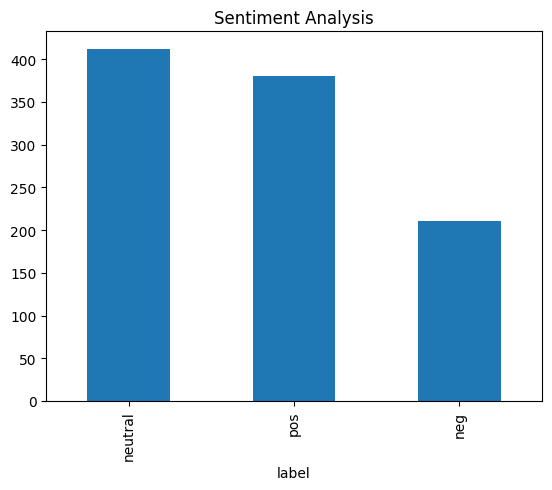

In [50]:
#visualise the label

cleaned_df.label.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [51]:
#removing neutral label since prediction within this project revolve
#with neg and pos only
df = cleaned_df[cleaned_df.label !="neutral"]

df.count()

full_text            591
lowercase            591
remove_link          591
mention              140
punctuation          591
expand_word          591
hashtag              591
remove_short         591
tokenized            591
stopwords_removed    591
pos_tags             591
wordnet_pos          591
lemmatized           591
label                591
dtype: int64

In [52]:
df

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,label
1,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth...","[shop, pay, app, full, orders, ordering, anyth...","[(shop, NN), (pay, NN), (app, VBP), (full, JJ)...","[(shop, n), (pay, n), (app, v), (full, a), (or...","['shop', 'pay', 'app', 'full', 'order', 'order...",pos
3,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s...","[tiktok, shop, succeed, instagram, shop, faile...","[(tiktok, NN), (shop, NN), (succeed, VB), (ins...","[(tiktok, n), (shop, n), (succeed, v), (instag...","['tiktok', 'shop', 'succeed', 'instagram', 'sh...",neg
4,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are...","[tiktok, changed, way, products, marketed, for...","[(tiktok, NNS), (changed, VBD), (way, NN), (pr...","[(tiktok, n), (changed, v), (way, n), (product...","['tiktok', 'change', 'way', 'product', 'market...",pos
5,tiktok shop is my new shopee app :&gt;&gt;&gt;...,tiktok shop is my new shopee app :&gt;&gt;&gt;...,tiktok shop is my new shopee app :&gt;&gt;&gt;...,None,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop new shopee app :gt;gt;gt;gt;,"[tiktok, shop, new, shopee, app, :, gt, ;, gt,...","[tiktok, shop, new, shopee, app, :, gt, ;, gt,...","[(tiktok, NN), (shop, VBD), (new, JJ), (shopee...","[(tiktok, n), (shop, v), (new, a), (shopee, a)...","['tiktok', 'shop', 'new', 'shopee', 'app', ':'...",pos
8,I can t stop buying stuff from tiktok shop I a...,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,None,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,can stop buying stuff from tiktok shop too eas...,"[can, stop, buying, stuff, from, tiktok, shop,...","[stop, buying, stuff, tiktok, shop, easily, in...","[(stop, JJ), (buying, NN), (stuff, NN), (tikto...","[(stop, a), (buying, n), (stuff, n), (tiktok, ...","['stop', 'buying', 'stuff', 'tiktok', 'shop', ...",pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,So you witches haven t been calling Whitney sm...,so you witches haven t been calling whitney sm...,so you witches haven t been calling whitney sm...,None,so you witches haven t been calling whitney sm...,so you witches haven t been calling whitney sm...,so you witches haven t been calling whitney sm...,you witches haven been calling whitney smug fo...,"[you, witches, haven, been, calling, whitney, ...","[witches, calling, whitney, smug, last, months...","[(witches, NNS), (calling, VBG), (whitney, NN)...","[(witches, n), (calling, v), (whitney, n), (sm...","['witch', 'call', 'whitney', 'smug', 'last', '...",neg
996,I stay on that TikTok shop lol,i stay on that tiktok shop lol,i stay on th

In [53]:
#rearrange the index

df = df.reset_index(drop=True)

In [54]:
df

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,label
0,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth...","[shop, pay, app, full, orders, ordering, anyth...","[(shop, NN), (pay, NN), (app, VBP), (full, JJ)...","[(shop, n), (pay, n), (app, v), (full, a), (or...","['shop', 'pay', 'app', 'full', 'order', 'order...",pos
1,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s...","[tiktok, shop, succeed, instagram, shop, faile...","[(tiktok, NN), (shop, NN), (succeed, VB), (ins...","[(tiktok, n), (shop, n), (succeed, v), (instag...","['tiktok', 'shop', 'succeed', 'instagram', 'sh...",neg
2,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are...","[tiktok, changed, way, products, marketed, for...","[(tiktok, NNS), (changed, VBD), (way, NN), (pr...","[(tiktok, n), (changed, v), (way, n), (product...","['tiktok', 'change', 'way', 'product', 'market...",pos
3,tiktok shop is my new shopee app :&gt;&gt;&gt;...,tiktok shop is my new shopee app :&gt;&gt;&gt;...,tiktok shop is my new shopee app :&gt;&gt;&gt;...,None,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop new shopee app :gt;gt;gt;gt;,"[tiktok, shop, new, shopee, app, :, gt, ;, gt,...","[tiktok, shop, new, shopee, app, :, gt, ;, gt,...","[(tiktok, NN), (shop, VBD), (new, JJ), (shopee...","[(tiktok, n), (shop, v), (new, a), (shopee, a)...","['tiktok', 'shop', 'new', 'shopee', 'app', ':'...",pos
4,I can t stop buying stuff from tiktok shop I a...,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,None,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,can stop buying stuff from tiktok shop too eas...,"[can, stop, buying, stuff, from, tiktok, shop,...","[stop, buying, stuff, tiktok, shop, easily, in...","[(stop, JJ), (buying, NN), (stuff, NN), (tikto...","[(stop, a), (buying, n), (stuff, n), (tiktok, ...","['stop', 'buying', 'stuff', 'tiktok', 'shop', ...",pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,So you witches haven t been calling Whitney sm...,so you witches haven t been calling whitney sm...,so you witches haven t been calling whitney sm...,None,so you witches haven t been calling whitney sm...,so you witches haven t been calling whitney sm...,so you witches haven t been calling whitney sm...,you witches haven been calling whitney smug fo...,"[you, witches, haven, been, calling, whitney, ...","[witches, calling, whitney, smug, last, months...","[(witches, NNS), (calling, VBG), (whitney, NN)...","[(witches, n), (calling, v), (whitney, n), (sm...","['witch', 'call', 'whitney', 'smug', 'last', '...",neg
587,I stay on that TikTok shop lol,i stay on that tiktok shop lol,i stay on th

# Exploratory Data Analysis


In [55]:
df

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,label
0,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth...","[shop, pay, app, full, orders, ordering, anyth...","[(shop, NN), (pay, NN), (app, VBP), (full, JJ)...","[(shop, n), (pay, n), (app, v), (full, a), (or...","['shop', 'pay', 'app', 'full', 'order', 'order...",pos
1,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s...","[tiktok, shop, succeed, instagram, shop, faile...","[(tiktok, NN), (shop, NN), (succeed, VB), (ins...","[(tiktok, n), (shop, n), (succeed, v), (instag...","['tiktok', 'shop', 'succeed', 'instagram', 'sh...",neg
2,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are...","[tiktok, changed, way, products, marketed, for...","[(tiktok, NNS), (changed, VBD), (way, NN), (pr...","[(tiktok, n), (changed, v), (way, n), (product...","['tiktok', 'change', 'way', 'product', 'market...",pos
3,tiktok shop is my new shopee app :&gt;&gt;&gt;...,tiktok shop is my new shopee app :&gt;&gt;&gt;...,tiktok shop is my new shopee app :&gt;&gt;&gt;...,None,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop new shopee app :gt;gt;gt;gt;,"[tiktok, shop, new, shopee, app, :, gt, ;, gt,...","[tiktok, shop, new, shopee, app, :, gt, ;, gt,...","[(tiktok, NN), (shop, VBD), (new, JJ), (shopee...","[(tiktok, n), (shop, v), (new, a), (shopee, a)...","['tiktok', 'shop', 'new', 'shopee', 'app', ':'...",pos
4,I can t stop buying stuff from tiktok shop I a...,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,None,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,can stop buying stuff from tiktok shop too eas...,"[can, stop, buying, stuff, from, tiktok, shop,...","[stop, buying, stuff, tiktok, shop, easily, in...","[(stop, JJ), (buying, NN), (stuff, NN), (tikto...","[(stop, a), (buying, n), (stuff, n), (tiktok, ...","['stop', 'buying', 'stuff', 'tiktok', 'shop', ...",pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,So you witches haven t been calling Whitney sm...,so you witches haven t been calling whitney sm...,so you witches haven t been calling whitney sm...,None,so you witches haven t been calling whitney sm...,so you witches haven t been calling whitney sm...,so you witches haven t been calling whitney sm...,you witches haven been calling whitney smug fo...,"[you, witches, haven, been, calling, whitney, ...","[witches, calling, whitney, smug, last, months...","[(witches, NNS), (calling, VBG), (whitney, NN)...","[(witches, n), (calling, v), (whitney, n), (sm...","['witch', 'call', 'whitney', 'smug', 'last', '...",neg
587,I stay on that TikTok shop lol,i stay on that tiktok shop lol,i stay on th

In [56]:
df.label.value_counts()

label
pos    380
neg    211
Name: count, dtype: int64

In [57]:
#To check null value

df.lemmatized.isnull().value_counts()

lemmatized
False    591
Name: count, dtype: int64

In [58]:
df.shape

(591, 14)

<Axes: title={'center': 'Sentiment Analysis'}, xlabel='label'>

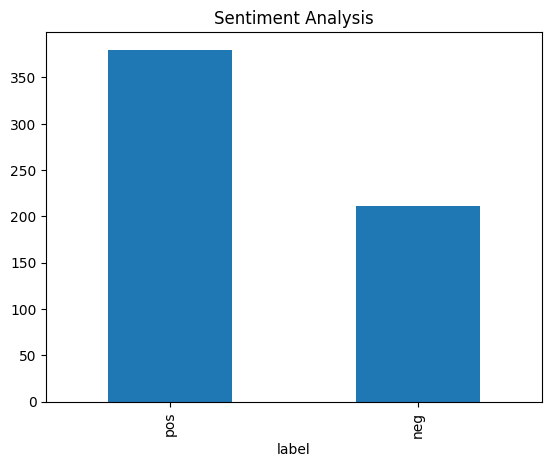

In [59]:
df.label.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [ ]:
#convert label to numeric values
df['label'] = df.label.map(lambda x: int(1) if x =='pos' 
                           else int(0) if x =='neg' else np.nan)
df.head()

,full_text,lowercase,remove_link,mention,punctuation,expand_word,hashtag,remove_short,tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized,label
0,My SHOP pay app full of orders I be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,None,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,my shop pay app full of orders i be ordering a...,shop pay app full orders ordering anything see...,"[shop, pay, app, full, orders, ordering, anyth...","[shop, pay, app, full, orders, ordering, anyth...","[(shop, NN), (pay, NN), (app, VBP), (full, JJ)...","[(shop, n), (pay, n), (app, v), (full, a), (or...","['shop', 'pay', 'app', 'full', 'order', 'order...",1
1,Why do TikTok Shop succeed but Instagram Shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,None,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why do tiktok shop succeed but instagram shop ...,why tiktok shop succeed but instagram shop fai...,"[why, tiktok, shop, succeed, but, instagram, s...","[tiktok, shop, succeed, instagram, shop, faile...","[(tiktok, NN), (shop, NN), (succeed, VB), (ins...","[(tiktok, n), (shop, n), (succeed, v), (instag...","['tiktok', 'shop', 'succeed', 'instagram', 'sh...",0
2,TikTok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,None,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,tiktok has changed the way products are market...,"[tiktok, has, changed, the, way, products, are...","[tiktok, changed, way, products, marketed, for...","[(tiktok, NNS), (changed, VBD), (way, NN), (pr...","[(tiktok, n), (changed, v), (way, n), (product...","['tiktok', 'change', 'way', 'product', 'market...",1
3,tiktok shop is my new shopee app :&gt;&gt;&gt;...,tiktok shop is my new shopee app :&gt;&gt;&gt;...,tiktok shop is my new shopee app :&gt;&gt;&gt;...,None,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop is my new shopee app :gt;gt;gt;gt;,tiktok shop new shopee app :gt;gt;gt;gt;,"[tiktok, shop, new, shopee, app, :, gt, ;, gt,...","[tiktok, shop, new, shopee, app, :, gt, ;, gt,...","[(tiktok, NN), (shop, VBD), (new, JJ), (shopee...","[(tiktok, n), (shop, v), (new, a), (shopee, a)...","['tiktok', 'shop', 'new', 'shopee', 'app', ':'...",1
4,I can t stop buying stuff from tiktok shop I a...,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,None,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,i can t stop buying stuff from tiktok shop i a...,can stop buying stuff from tiktok shop too eas...,"[can, stop, buying, stuff, from, tiktok, shop,...","[stop, buying, stuff, tiktok, shop, easily, in...","[(stop, JJ), (buying, NN), (stuff, NN), (tikto...","[(stop, a), (buying, n), (stuff, n), (tiktok, ...","['stop', 'buying', 'stuff', 'tiktok', 'shop', ...",1


In [61]:
df= df[['lemmatized','label']]
df.head()

,lemmatized,label
0,"['shop', 'pay', 'app', 'full', 'order', 'order...",1
1,"['tiktok', 'shop', 'succeed', 'instagram', 'sh...",0
2,"['tiktok', 'change', 'way', 'product', 'market...",1
3,"['tiktok', 'shop', 'new', 'shopee', 'app', ':'...",1
4,"['stop', 'buying', 'stuff', 'tiktok', 'shop', ...",1


In [62]:
from sklearn.model_selection import train_test_split
lemmatize = df['lemmatized'].values
labels = df['label'].values
lemmatize_train, lemmatize_test, labels_train, labels_test = train_test_split(lemmatize, labels)

print(lemmatize_train.shape)
print(lemmatize_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(443,)
(148,)
(443,)
(148,)


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatizer = WordNetLemmatizer()
corpus=[]
messages = df.lemmatized.tolist()

for i in range(0, len(messages)):
    message = re.sub('[^a-zA-Z]', ' ', str(messages[i]))
    message = message.lower()
    message = message.split()
    message = [lemmatizer.lemmatize(word) for word in message if not word in stopwords.words('english')]
    message = ' '.join(message)
    corpus.append(message)

In [64]:
vectorizer = TfidfVectorizer(min_df = 5,
                              max_df = 0.8,
                              sublinear_tf = True,
                              use_idf = True)

In [65]:
tfidf = vectorizer.fit_transform(df.lemmatized)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer = vectorizer.fit(corpus)
X = vectorizer.transform(corpus).toarray()

X.shape

(591, 2309)

In [67]:
y = df['label'].replace(0, -1)

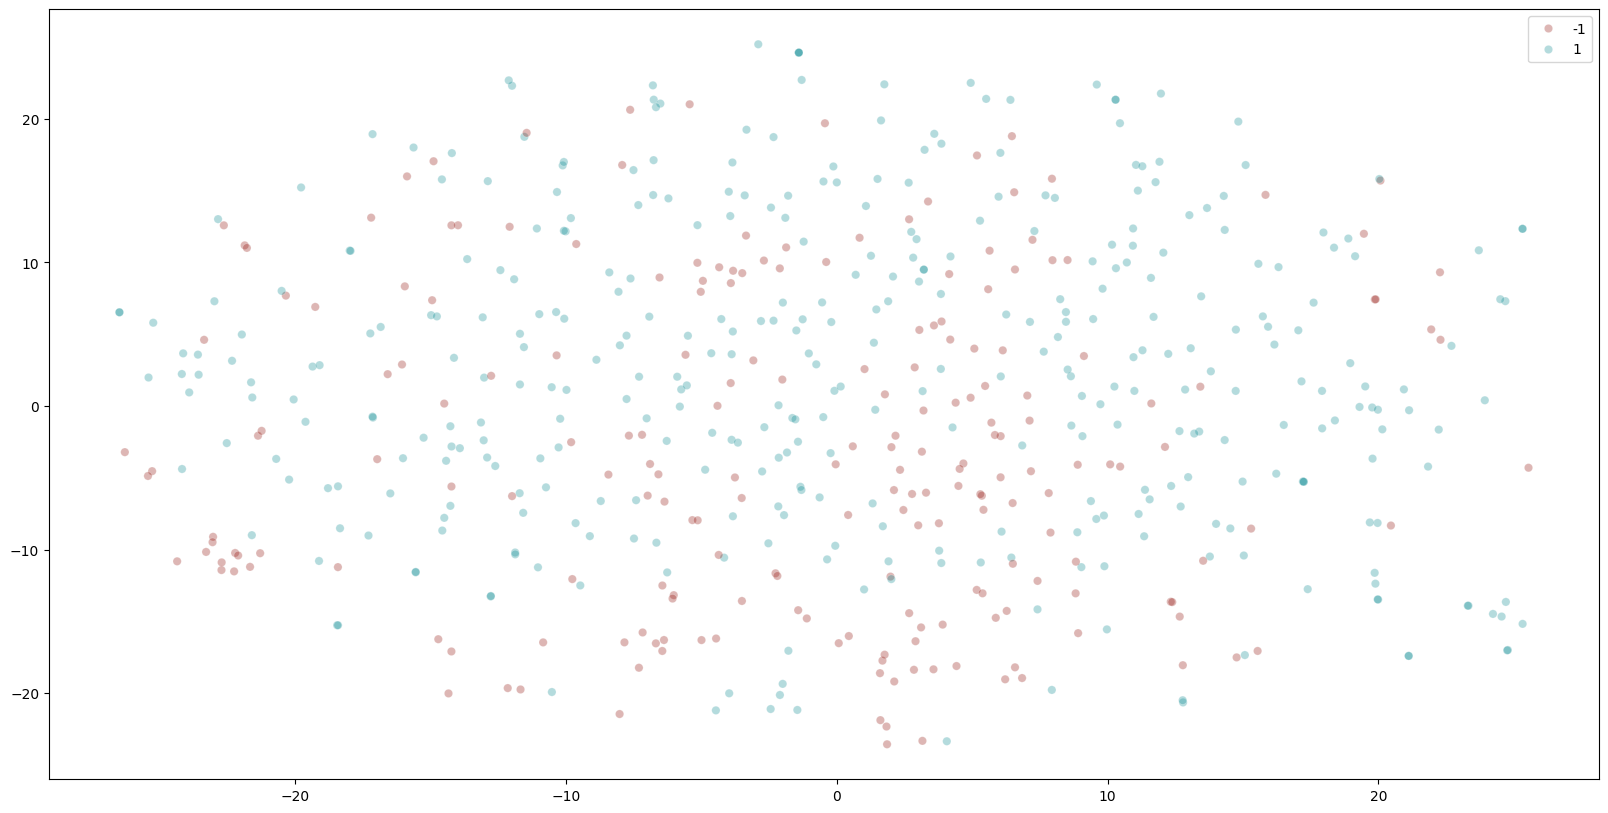

In [68]:
from sklearn.manifold import TSNE
import seaborn as sns
labels = y.to_list()
tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(X)
plt.figure(figsize=(20,10))
palette = sns.hls_palette(2, l=.3, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    palette= palette,
    legend="full",
    alpha=0.3
)
plt.show()

In [69]:
# Split dataset to Testing and Training

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#70/30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [70]:
X_train.shape

(413, 2309)

In [71]:
X_test.shape

(178, 2309)

# SVM Algorithm

In [72]:
from collections import Counter

In [73]:
print("Before SMOTE :" , Counter(y_train))

Before SMOTE : Counter({1: 263, -1: 150})


In [74]:
sm = SMOTE(random_state=2, sampling_strategy='auto', k_neighbors=5)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

In [75]:
print("After SMOTE :" , Counter(y_train))

After SMOTE : Counter({1: 263, -1: 150})


In [76]:
#To create kernel Matrix
k_value = np.array(X_train @ X_train.T + np.identity(len(y_train))*1e-12)
k_value

array([[1.        , 0.06510308, 0.01621964, ..., 0.01116388, 0.01476565,
        0.01404713],
       [0.06510308, 1.        , 0.01207918, ..., 0.00831403, 0.01099636,
        0.01046125],
       [0.01621964, 0.01207918, 1.        , ..., 0.01326927, 0.01755029,
        0.09820446],
       ...,
       [0.01116388, 0.00831403, 0.01326927, ..., 1.        , 0.01207976,
        0.01149193],
       [0.01476565, 0.01099636, 0.01755029, ..., 0.01207976, 1.        ,
        0.11726512],
       [0.01404713, 0.01046125, 0.09820446, ..., 0.01149193, 0.11726512,
        1.        ]])

In [77]:
#To set up and minimize the dual function
#Create optimization variables
alpha = cp.Variable(shape = y_train.shape)

#To simplify notation
beta = cp.multiply(alpha, y_train)

K = cp.Parameter(shape = k_value.shape, PSD = True, value = k_value)

#Objective function
obj = .5 * cp.quad_form(beta, K) - np.ones(alpha.shape).T @ alpha

class_weights = dict(zip(np.unique(y_train), 
                        [1 / (np.sum(y_train == c) / len(y_train)) for c in np.unique(y_train)]))

#Constraints
const = [np.array(y_train.T) @ alpha == 0,
         -alpha <= np.zeros(alpha.shape),
         alpha <= [10 * class_weights[y] for y in y_train]]

prob = cp.Problem(cp.Minimize(obj), const)

In [78]:
result = prob.solve()

In [79]:
np.linalg.cholesky(k_value) #to check PSD

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.51030773e-02,  9.97878544e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.62196441e-02,  1.10466665e-02,  9.99807429e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.11638824e-02,  7.60335335e-03,  1.30067079e-02, ...,
         1.22483330e-06,  0.00000000e+00,  0.00000000e+00],
       [ 1.47656520e-02,  1.00564003e-02,  1.72030228e-02, ...,
         2.28963325e-09,  6.27903840e-01,  0.00000000e+00],
       [ 1.40471256e-02,  9.56703555e-03,  9.78897853e-02, ...,
        -2.57428699e-09,  8.95222842e-03,  7.02721257e-01]])

In [80]:
w = np.multiply(y_train, alpha.value).T @ X_train

In [81]:
S = (alpha.value > 1e-4).flatten()
b = y_train[S] - X_train[S] @ w
# b = b[0]
b = np.mean(b)

In [82]:
def classify(x):
    result = w @ x + b
    return np.sign(result)

In [83]:
import numpy as np
correct = 0
incorrect = 0
predictions = []
for i in X_test:
    my_svm = classify(i)
    
    predictions = np.append(predictions, my_svm)
    
    predictions = np.array(predictions)

In [84]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.80      0.64      0.71        61
           1       0.83      0.91      0.87       117

    accuracy                           0.82       178
   macro avg       0.81      0.78      0.79       178
weighted avg       0.82      0.82      0.81       178



In [85]:
accuracy_score(y_test, predictions)
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, predictions)*100))

Model accuracy score with linear kernel and C=100.0 : 82.0225


In [86]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

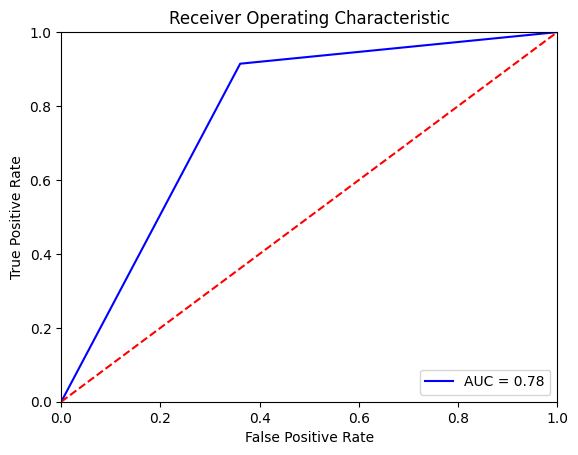

In [87]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<Figure size 800x600 with 0 Axes>

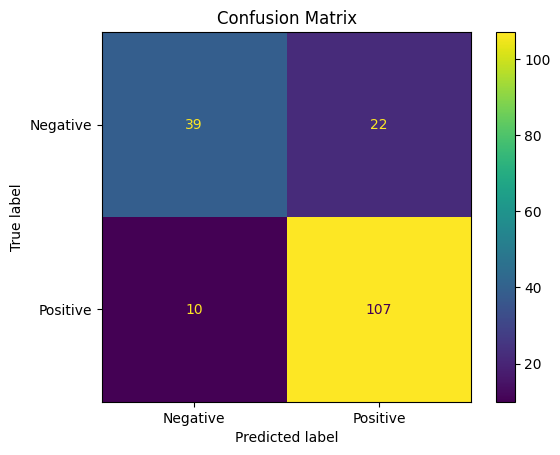

In [88]:
# import matplotlib.pyplot as plt
# import numpy
# from sklearn import metrics

# actual = numpy.random.binomial(1,.9,size = 1000)
# predicted = numpy.random.binomial(1,.9,size = 1000)

# confusion_matrix = metrics.confusion_matrix(actual, predicted)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show()

import matplotlib.pyplot as plt
from sklearn import metrics

# Create and display confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, 
                                          display_labels=['Negative', 'Positive'])

plt.figure(figsize=(8, 6))
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# WORDCLOUD

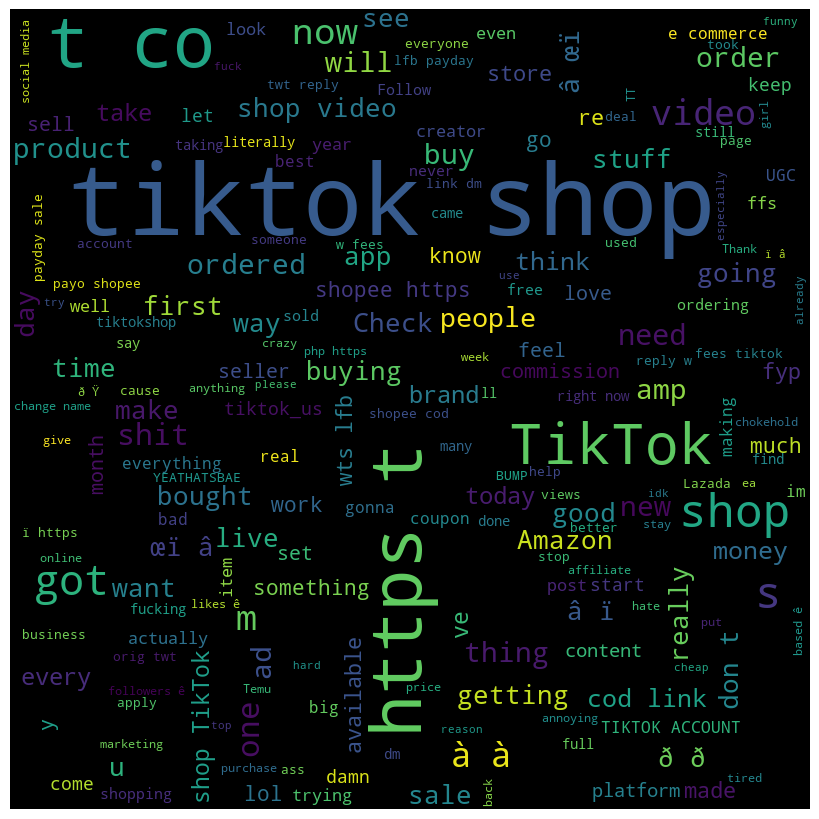

In [89]:
# import required libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# read data into a dataframe
df = pd.read_csv(r'F:\Uni Stuff\BUSINESS CASE_GROUP PROJECT\Preprocessed_Data')

# combine all text into a single string
text = ' '.join(df['full_text'].tolist())

# create a WordCloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(text)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# show the plot
plt.show()


In [90]:
# Save the trained model and vectorizer
import pickle
import os

# Create model directory if it doesn't exist
model_dir = 'model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the SVM model components
model_components = {
    'weights': w,
    'bias': b,
    'support_vectors': X_train[S],
    'support_vector_labels': y_train[S],
    'vectorizer': vectorizer
}

# Save model components
model_path = os.path.join(model_dir, 'svm_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(model_components, f)

print(f"Model saved successfully at: {os.path.abspath(model_path)}")


Model saved successfully at: f:\Uni Stuff\BUSINESS CASE_GROUP PROJECT\model\svm_model.pkl
